In [45]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [46]:
dirname = "/home/daniela/git/analyzing-corpora/data/data/enron_out_0.1/"

In [47]:

from corpora.scikit import ScikitLda

import os
import zlib
import numpy
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances
from scipy.spatial.distance import cosine
from scipy import sparse
topics = []
for subdir in [x[0] for x in os.walk(dirname)][1:]:
    for filename in os.listdir(subdir):
        if filename.endswith('pkl'):
            print("attempting... ", filename)
            lda = ScikitLda.load(subdir+"/"+filename)
            for topic in lda.topics:
                topics.append(topic / topic.sum())

('attempting... ', 'lda_87.pkl')
('attempting... ', 'lda_3.pkl')
('attempting... ', 'lda_20.pkl')
('attempting... ', 'lda_100.pkl')
('attempting... ', 'lda_4.pkl')
('attempting... ', 'lda_43.pkl')
('attempting... ', 'lda_63.pkl')
('attempting... ', 'lda_34.pkl')
('attempting... ', 'lda_74.pkl')
('attempting... ', 'lda_7.pkl')
('attempting... ', 'lda_52.pkl')
('attempting... ', 'lda_27.pkl')
('attempting... ', 'lda_15.pkl')


In [48]:
topics

[array([  1.56543402e-09,   1.56543402e-09,   1.56543402e-09, ...,
          1.56543402e-09,   1.56543402e-09,   1.56543402e-09]),
 array([  2.26854583e-07,   2.26854583e-07,   2.26854583e-07, ...,
          2.26854583e-07,   2.26854583e-07,   2.26854583e-07]),
 array([  3.01134467e-08,   3.01134467e-08,   3.01134467e-08, ...,
          3.01134467e-08,   3.01134467e-08,   3.01134467e-08]),
 array([  4.71741237e-08,   4.71741237e-08,   4.71741237e-08, ...,
          4.71741237e-08,   4.71741237e-08,   4.71741237e-08]),
 array([  5.03724032e-09,   5.03724032e-09,   5.03724032e-09, ...,
          5.03724032e-09,   5.03724032e-09,   5.03724032e-09]),
 array([  6.30511418e-09,   6.30511418e-09,   6.30511418e-09, ...,
          6.30511418e-09,   6.30511418e-09,   6.30511418e-09]),
 array([  8.86065597e-08,   8.86065597e-08,   8.86065597e-08, ...,
          8.86065597e-08,   8.86065597e-08,   8.86065597e-08]),
 array([  3.00552207e-08,   3.00552207e-08,   3.00552207e-08, ...,
          3.0055

In [49]:
'''
The first step is convert the similarity matrix into distance matrix(=dist_matrix). 
Note: more similar the item, lesser is their distance.
'''
cos_distance = pairwise_distances(topics, metric='cosine')

In [50]:
cos_distance

array([[  7.73603404e-13,   9.99980031e-01,   9.93270756e-01, ...,
          9.93294338e-01,   9.94183725e-01,   9.21961588e-01],
       [  9.99980031e-01,  -1.40065737e-12,   9.99996223e-01, ...,
          9.98381465e-01,   9.99965391e-01,   9.98948422e-01],
       [  9.93270756e-01,   9.99996223e-01,   7.12796489e-12, ...,
          6.82165117e-01,   9.99851339e-01,   9.22496272e-01],
       ..., 
       [  9.93294338e-01,   9.98381465e-01,   6.82165117e-01, ...,
         -2.27773356e-12,   9.98406192e-01,   8.49138435e-01],
       [  9.94183725e-01,   9.99965391e-01,   9.99851339e-01, ...,
          9.98406192e-01,   4.53770355e-12,   9.99725539e-01],
       [  9.21961588e-01,   9.98948422e-01,   9.22496272e-01, ...,
          8.49138435e-01,   9.99725539e-01,   4.86455320e-12]])

In [92]:
len(topics)  # number of topics

529

In [51]:
from sklearn import manifold

In [234]:
from sklearn.manifold import MDS 
MDS() 
# pick number of components=2 so that we can plot on 2-space., random_state is chosen so that we can re-produce. 
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1) 
pos = mds.fit_transform(cos_distance) # shape (n_components, n_samples) 
xs, ys = pos[:, 0], pos[:, 1]

In [93]:
len(pos) # good

529

In [235]:
import matplotlib.pyplot as plt

In [236]:
from sklearn.cluster import KMeans
k_fit = KMeans(n_clusters=25).fit_predict(cos_distance)

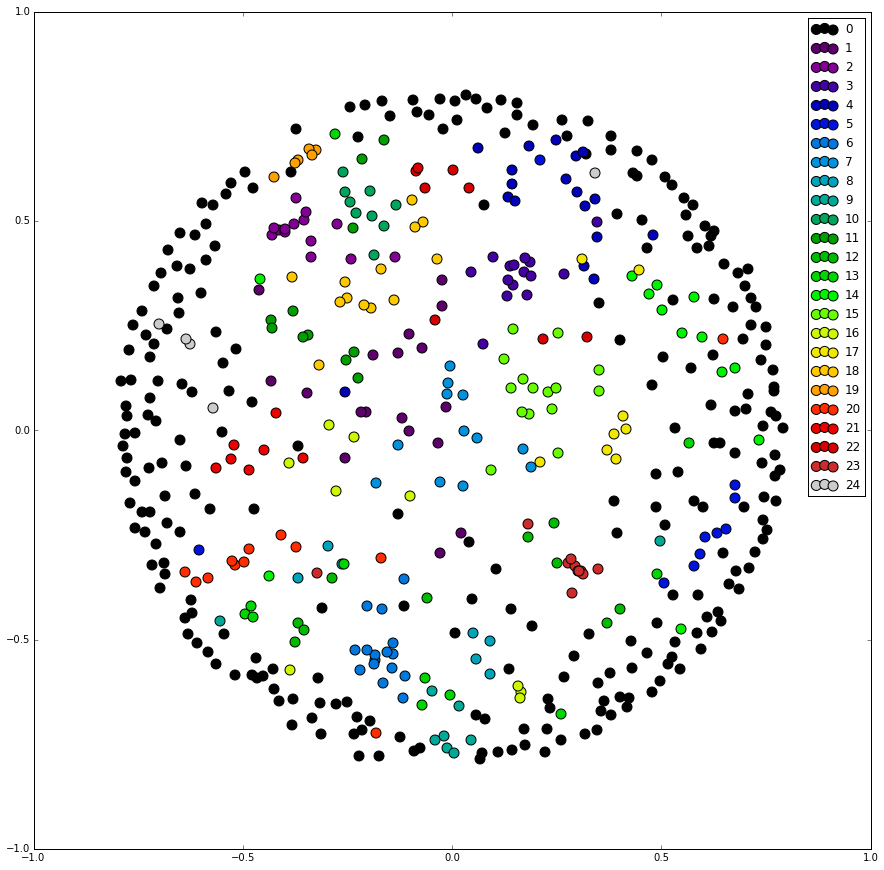

In [241]:
figure(figsize=(15,15))

x = np.arange(10)
yys = [i+x+(i*x)**2 for i in range(25)]
colors = cm.nipy_spectral(np.linspace(0, 1, 25))
#print colors[24]

#plt.scatter(xs,ys, c=k_fit, s=100)
for idx in range(0,25):
    plt.scatter(xs[numpy.where(k_fit==idx)], ys[numpy.where(k_fit==idx)], s=100, label=str(idx), c=colors[idx])
plt.legend()    
#print xs[numpy.where(k_fit==0)]
#colorbar()

In [244]:
import gensim
dic = gensim.corpora.Dictionary.load("/home/daniela/git/analyzing-corpora/data/data/filtered_0.1_5_1000000.dic")

In [245]:
len(dic)

175884

In [246]:
k_fit # which topic belongs to which cluster

array([ 1,  0,  0,  0, 19, 18,  0, 24,  0,  0,  0,  0,  0, 14,  0,  0,  7,
        0,  0,  0,  5,  0,  2, 16, 10,  0,  0, 11,  0,  0,  1,  0,  0, 23,
        0,  0,  3,  9,  5,  0,  0,  0,  0,  0,  0,  0, 18,  0,  0,  0,  7,
        0, 14,  0,  0,  0,  0, 21, 17, 18,  0,  8,  0, 19,  0,  0,  0,  0,
        0,  0,  0, 20,  0,  4,  1,  6,  0, 22,  0, 15,  0, 13,  0,  0,  6,
        4,  0,  2,  1,  7,  3, 15,  0,  8, 22,  0,  2,  3,  6,  7, 12, 20,
       10,  0,  1,  0, 11, 17, 18, 16, 23, 23, 15,  0, 18, 24,  0,  0,  0,
        0,  4,  0,  0,  0,  0, 12,  0,  0,  0, 13,  0,  0,  4,  0,  0,  0,
       10,  0,  0, 18, 14,  0,  0,  1,  3,  0,  0,  0,  9,  0,  0,  0, 11,
       16, 17,  0,  0,  0, 22,  0,  0,  0,  2, 20,  7,  0,  0,  0,  0,  0,
        0, 13,  0, 21,  1,  0, 19, 20,  0, 15,  0,  0,  0,  0,  5,  3,  0,
        0,  3,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        6,  8,  4,  0,  0,  0,  7, 15, 16,  2,  4,  3, 19,  2, 13,  8,  9,
        0, 23,  0,  0,  0

In [253]:
cluster_indices = [ numpy.where(k_fit==n) for n in range(0,25) ]
[n for n in cluster_indices[2][0]]
print cluster_indices[2][0]
topic_out = [topics[n] for n in cluster_indices[2][0]]
print numpy.shape(topic_out)
#print cluster_indices
#print numpy.shape(topics)
#topicsn = [ topics[cluster_indices[0][0][n] for n in range(0,len(cluster_indeces[0][0]))] ]
#print cluster_indices[0][0]
#print numpy.shape(cluster_indices)

[ 22  87  96 162 213 217 285 351 405 429 484 503 514 524]
(14, 175884)


In [254]:
def return_n_words(dic, topic, n_words):
  aa = [(dic[idx],topic[idx]) for idx in argsort(topic)[-n_words:] ]
  return dict(aa)

In [255]:
#topic_weights = []
#topic_weights = [ return_n_words(dic, topics[idx], 10) for idx in range(0,len(topics[0:3])) ]
topic_weights = [ return_n_words(dic, topic_out[idx], 10) for idx in range(0,len(topic_out[:])) ]

#return_n_words(dic, topics[0], 10)
topic_weights

[{u'customers': 0.0093359539757801764,
  u'electricity': 0.010082085228111767,
  u'energy': 0.028415143768411394,
  u'ferc': 0.016839139397345843,
  u'generation': 0.0094377511872202648,
  u'iso': 0.010995801331699154,
  u'market': 0.023283386258362772,
  u'plants': 0.01086415186315914,
  u'power': 0.060262133887722037,
  u'prices': 0.016056860840008458},
 {u"'s": 0.0033211896567286411,
  u'companies': 0.0027877483028794451,
  u'company': 0.0062868314263244207,
  u'electricity': 0.004112109525449657,
  u'energy': 0.0075793748312735394,
  u'image': 0.0041211827446192301,
  u'power': 0.0090059254021856265,
  u'said': 0.012436513984494527,
  u'state': 0.0069907415051145292,
  u'year': 0.0031297033070937451},
 {u'company': 0.0078631067040614774,
  u'electricity': 0.010232748114517572,
  u'energy': 0.023001242666512583,
  u'gas': 0.008781228304147199,
  u'market': 0.01019883550875066,
  u'power': 0.027168247514124784,
  u'prices': 0.0071105205232306224,
  u'said': 0.023987631645763282,
  u'

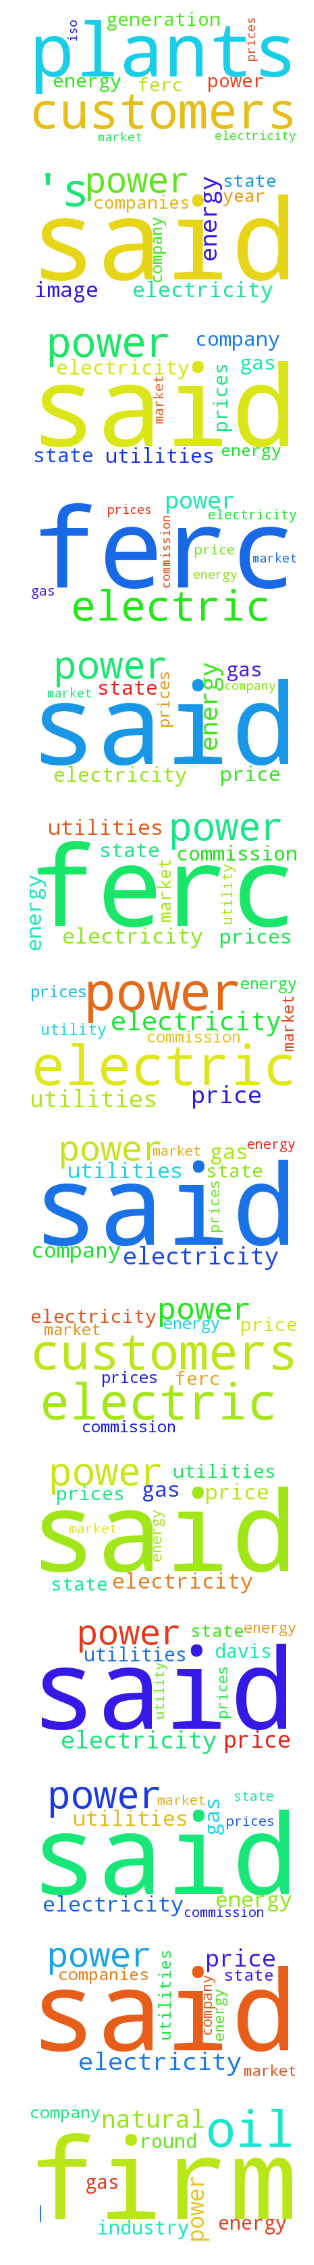

In [256]:
figure(figsize=(16,40))
for idx,topic in enumerate(topic_weights):
    wc = WordCloud(background_color="white")
    ww = [(word,weight) for word,weight in topic.iteritems()]
    img = wc.generate_from_frequencies(ww)
    subplot(len(topic_weights),2,2*idx+1)
    imshow(img)
    axis('off')
    
#    subplot(nTopics,2,2*idx+2)
#    plot(topicsByAge[:,idx])
#    axis([10, 100, 0, 1.0])
#    title('Topic #%2d'%(idx))

In [137]:
topic_weights

[{u'attempting': 0.0042718758508231685,
  u'contract': 0.0058957541343635737,
  u'contracts': 0.006844541819375544,
  u'cost': 0.0053567797397312137,
  u'due': 0.0052003480577177789,
  u'however': 0.0050988362354636371,
  u'month': 0.0042827824196166615,
  u'occurred': 0.0046752601120512525,
  u'rate': 0.0091070106692935013,
  u'term': 0.0043865895372844424},
 {u'>>>': 0.031348132495766991,
  u'allison': 0.041445466600460994,
  u'amanda': 0.027717540107928901,
  u'amazon': 0.021314509450177467,
  u'barreda/hou/ees@ees': 0.016042917947813828,
  u'follows': 0.3025403900014646,
  u'fran': 0.037564717893894317,
  u'fy': 0.014543514945314544,
  u'kopper': 0.015877213260706825,
  u'margo': 0.024191512980354345},
 {u'@': 0.03861033458784463,
  u'chris': 0.087313635790042032,
  u'eric': 0.049525833760854017,
  u'fw': 0.025234688300349951,
  u'h': 0.019141343332273505,
  u'joe': 0.098102570522967808,
  u'john': 0.13671271009850067,
  u'julie': 0.021790886432399455,
  u'robin': 0.021982231283148